# **Loan Prediction Based on Customer Behavior**

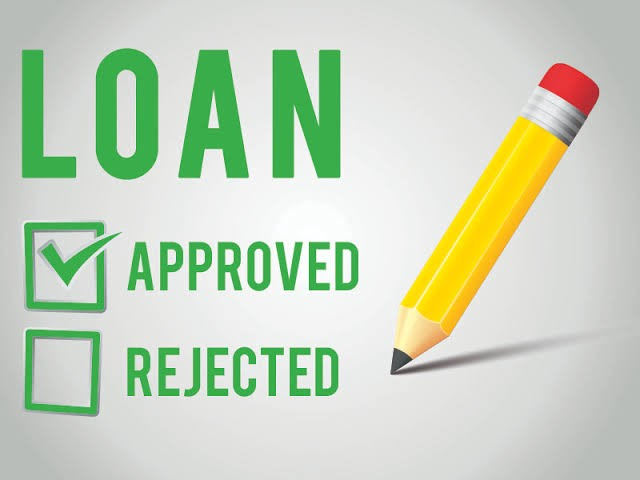

## Content
> All values were provided at the time of the loan application.

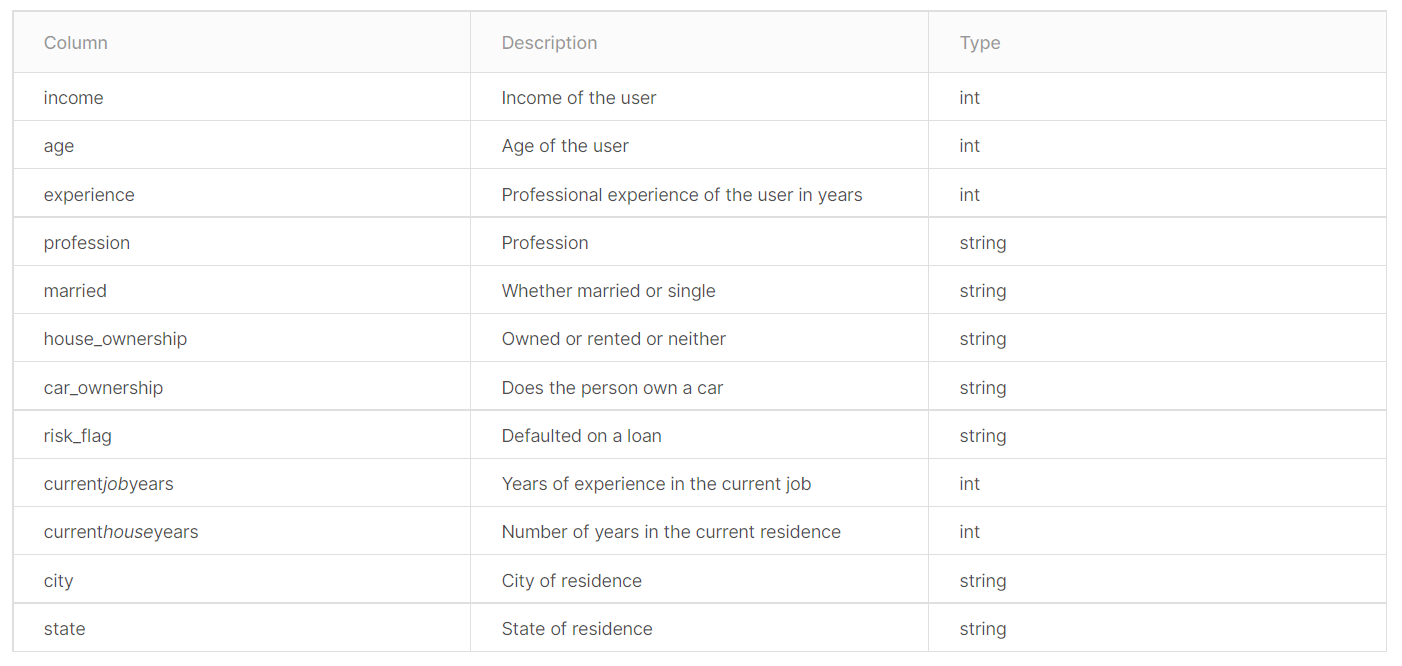

>The risk_flag indicates whether there has been a default in the past or not.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install minisom

# **Importing the Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
import re

# **Importing the Training and Test data**

In [ ]:
train_data = pd.read_csv('/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv')
test_data = pd.read_csv('/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv')
print("The shape of training data is: ", train_data.shape)
print("The shape of test data is: ", test_data.shape)

# **Basic Data Wrangling**

In [ ]:
print("Training Data")
print("******************************")
display(train_data.head())
print()
print("Test Data")
print("******************************")
display(test_data.head())

In [ ]:
print("Training Data")
print("******************************")
display(train_data.describe(include = 'all'))
print()
print("Test Data")
print("******************************")
display(test_data.describe(include = 'all'))

In [ ]:
print("Training Data")
print("******************************")
display(train_data.info())
print()
print("Test Data")
print("******************************")
display(test_data.info())

In [ ]:
print("Training Data")
print("******************************")
display(train_data.isnull().sum())
print()
print("Test Data")
print("******************************")
display(test_data.isnull().sum())

# **Exploratory Data Analysis**

In [ ]:
fig = px.box(data_frame = train_data, y = 'Income', title = 'Box Plot for Statisctical analysis of the Income Column')
fig.show()

**Observations** : 
1. Mean income 5M
2. Highest income: 9.99M, Lowest income: 10.3K

In [ ]:
fig = px.box(data_frame = train_data, y = 'Age', title = 'Box Plot for Statisctical analysis of the Age Column')
fig.show()

**Observations** : 
1. Mean age is around 50.
2. Maximum age: 79, Minimum age: 21.

In [ ]:
train_data["House_Ownership"].replace({"rented": "Rented", "owned": "Owned", "norent_noown": "Neither Rent nor Own"}, inplace=True)
fig = go.Figure(data = [go.Pie(labels = train_data['House_Ownership'], pull=[0.05, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size = 15, hole = 0.4,
                  marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text = "House Ownership")
fig.show()

**Observations** : 
1. Approximately 92% of the entire population rents a House, accounting to around 232K people.
2. Renting a House seems to be more of an obvious choice than owning one, which accounts to nearly 5.13% of the entire population.
3. Only 2.85% of the total population neither owns a House nor rents one.

In [ ]:
train_data["Car_Ownership"].replace({"no": "No", "yes": "Yes"}, inplace=True)
fig = go.Figure(data = [go.Pie(labels = train_data['Car_Ownership'])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="Car Ownership")
fig.show()

**Observations** : 
1. Around 69.8% of the entire population doesn't own a Car, accounting to around 176K people.
2. On the contrary around 30.2% of the entire population owns a Car.

In [ ]:
train_data["Married/Single"].replace({"single": "Single", "married": "Married"}, inplace=True)
fig = go.Figure(data = [go.Pie(labels = train_data['Married/Single'])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="Maritial Status")
fig.show()

**Observations** : 
1. Around 89.8% of the entire population is "Single", accounting to around 226K people.
2. On the contrary only 10.2% of the entire population is "Married".

In [ ]:
for i in range(0, 252000):
    state = train_data['STATE'][i]
    state = re.sub('_', ' ', state)
    train_data['STATE'][i] = state

fig = go.Figure(data = [go.Pie(labels = train_data['STATE'])])
fig.update_traces(textposition='inside', hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size = 15, hole = 0.4,
                  marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = "State Analysis", 
                  annotations=[dict(text='States', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

**Observations** : 
1. The state accounting to the maximum census in this dataset is "Uttar Pradesh", followed by "Maharashtra" and "Andhra Pradesh".
2. "Sikkim" accounts for the least population in this dataset, constituting only around 0.24% of the entire dataset.

In [ ]:
for i in range(0, 252000):
    profession = train_data['Profession'][i]
    profession = re.sub('_', ' ', profession)
    train_data['Profession'][i] = profession

fig = go.Figure(data = [go.Pie(labels = train_data['Profession'])])
fig.update_traces(textposition='inside', hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size = 15, hole = 0.4,
                  marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title_text = "Profession Analysis", 
                  annotations=[dict(text='Professions', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

**Observations** : 
1. The Profession of a "Physician" is the most popular, followed closely by that of a "Statistician".
2. Supprisingly the Profession, which is least opted is that of an "Engineer".

In [ ]:
train_data['Age Bins'] = ''
for i in range(0, 252000):
    if train_data['Age'][i] > 15 and train_data['Age'][i] < 25:
        train_data['Age Bins'][i] = 'Youth'
    elif train_data['Age'][i] >= 25 and train_data['Age'][i] <= 50:
        train_data['Age Bins'][i] = 'Adult'
    elif train_data['Age'][i] > 50:
        train_data['Age Bins'][i] = 'Senior'
    else:
         train_data['Age Bins'][i] = 'Child'

df = train_data['Age Bins'].value_counts()
fig = go.Figure(data=[go.Bar(x = df.index, y = df.values, text = df.values)])
fig.update_traces(marker_color='rgb(100,200,200)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Age Binning', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show()

**Observations** : 
1. Mostly the dataset comprises of Seniors and Adults, with each category accounting ti about 120K and 110K respectively.
2. Youth pouplation constitutes only around 17K of the entire population.

In [ ]:
fig = px.histogram(x = train_data['Age Bins'], color = train_data['House_Ownership'], title = 'Categorization of House Ownership amongst different Age Groups',
            labels = {'x': 'Age Groups'})
fig.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2, opacity=0.5)
fig.show()

**Observations** : 
1. Maximum of the Youth population lives in Rented Houses/Apartments
2. A similar trend can be seen in the case of Adults as well as Senior citizens, a fraction of the population Owns a House/Apartment.

In [ ]:
fig = px.histogram(x = train_data['Age Bins'], color = train_data['Car_Ownership'], title = 'Categorization of Car Ownership amongst different Age Groups',
            labels = {'x': 'Age Groups'})
fig.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2, opacity=0.5)
fig.show()

**Observations** : 
1. A huge chunk of the population don't own a car.
2. Going green. Nice.

In [ ]:
fig = px.histogram(x = train_data['Age Bins'], color = train_data['Married/Single'], title = 'Categorization of Maritial Status amongst different Age Groups',
            labels = {'x': 'Age Groups'})
fig.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2, opacity=0.5)
fig.show()

**Observations** : 
1. The majority of the census is Unmarried.

In [ ]:
fig = px.histogram(x = train_data['Age Bins'], color = train_data['Risk_Flag'], title = 'Categorization of Risk Flag amongst different Age Groups',
            labels = {'x': 'Age Groups'})
fig.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2, opacity=0.5)
fig.show()

**Observations** : 
1. Maximum loan deafulters are either Adults or Senior Citizens
2. A small fraction of the Youth consitutes the loan deafulters category.

# **Random Forest Classifier**
### Classifying Loan Defaulters based on Random Forest

## **Feature Engineering**

In [ ]:
def feature_engineering(df):
    
    labelEncoder = LabelEncoder()
    df['Married/Single'] = labelEncoder.fit_transform(df['Married/Single'])
    df['House_Ownership'] = labelEncoder.fit_transform(df['House_Ownership'])
    df['Car_Ownership'] = labelEncoder.fit_transform(df['Car_Ownership'])
    df['Profession'] = labelEncoder.fit_transform(df['Profession'])
    df['CITY'] = labelEncoder.fit_transform(df['CITY'])
    df['STATE'] = labelEncoder.fit_transform(df['STATE'])
    
    return df

## **Splitting the Training dataset and applying Feature Scaling**

In [ ]:
new_train = dtrain_data = train_data.copy()

In [ ]:
train = feature_engineering(train_data)
train.drop(['Id', 'Age Bins'], inplace = True, axis = 1)

X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## **Training the Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators = 400, criterion = 'entropy')
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

## **Making New Predictions and determining various Statistical Metrics**

In [ ]:
predictions = rf.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, predictions)))
print()
print("Classification Report:")
print(classification_report(y_test, predictions))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, predictions)))

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.figure(figsize = (12, 8))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

## **Making New Predictions on the Test Data**

In [ ]:
test = feature_engineering(test_data)
test.drop('ID', inplace = True, axis = 1)

# Feature Scaling
sc_X = StandardScaler()
test = sc_X.fit_transform(test)

pred = rf.predict(test)

# **Self Organizing Map (SOM)**
### Predicting the future risk_flag based on customer behaviours

## **Splitting the dataset and applying Feature Scaling**

In [ ]:
new_train.drop('Age Bins', inplace = True, axis = 1)

labelEncoder = LabelEncoder()
new_train['Married/Single'] = labelEncoder.fit_transform(new_train['Married/Single'])
new_train['House_Ownership'] = labelEncoder.fit_transform(new_train['House_Ownership'])
new_train['Car_Ownership'] = labelEncoder.fit_transform(new_train['Car_Ownership'])
new_train['Profession'] = labelEncoder.fit_transform(new_train['Profession'])
new_train['CITY'] = labelEncoder.fit_transform(new_train['CITY'])
new_train['STATE'] = labelEncoder.fit_transform(new_train['STATE'])

X = new_train.iloc[:, :-1].values
y = new_train.iloc[:, -1].values

# Feature Scaling
sc_X = MinMaxScaler(feature_range = (0, 1))
X = sc_X.fit_transform(X)

## **Training the Self Organizing Map**

In [ ]:
# Training the SOM
som = MiniSom(x = 10, y = 10, input_len = 12, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## **Visualizing the Results**

In [ ]:
# Visualizing the Results
plt.figure(figsize = (12, 8))
bone()
pcolor(som.distance_map().T)
# distance_map() - will return all the Mean Inter-neuron Distances in one Matrix.
colorbar()
markers = ['o', 's'] 
colors = ['r', 'g']  
for i,x in enumerate(X): 
    w = som.winner(x)  
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor= 'None',
         markersize = 10,
         markeredgewidth = 2)

In [ ]:
# Finding the Risk_Flags
mappings = som.win_map(X)
risk = np.concatenate((mappings[(1,1)], mappings[(8,3)]), axis = 0)
risk = sc_X.inverse_transform(risk)

In [ ]:
# Printing the list of Risk_Flags
print('Risk Flag Customer IDs: ')
for i in risk[:, 0]:
    print(int(i))

# **The End !**
## **Thank You**